# Numerical Simulation Laboratory                                                         
                                        Department of Physics, University of Milan(It)
                                        Spring 2020 
                                                                     Mattia Corigliano
## 12<sup>th </sup> Computational Exercise

## Machine Learning II
## Deep and Convolutional Neural Network image recognition

*In the last computational exercise we faced the problem of training a deep neural network (DNN) and a convolutional neural network (CNN) to recognize input images taken from the MNIST dataset.
The MNIST dataset contains 70k images of handwritten digits. For both architectures (DNN and CNN) different settings are tested and compared.*

In [1]:
### importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

##  setting the Layout
import matplotlib as mpl
## LINES
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-'
## AXES
mpl.rcParams['axes.linewidth'] = 1 ## edge linewidth
mpl.rcParams['axes.grid'] = True ## display grid or not
mpl.rcParams['axes.titlesize'] = 16 ## fontsize of the axes title
#mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 14  ## fontsize of the x any y labels
mpl.rcParams['axes.formatter.limits'] = [-2,6] # use scientific notation if log10
mpl.rcParams['axes.formatter.use_mathtext'] = True # When True, use mathtext for scientific
mpl.rcParams['legend.fontsize'] = 12
## TICKS
mpl.rcParams['xtick.labelsize'] = 12 ## fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = 12 
mpl.rcParams['xtick.minor.visible'] = True ## visibility of minor ticks on x-axis
mpl.rcParams['ytick.minor.visible'] = True
## FIGURE
mpl.rcParams['figure.titleweight'] = 'bold' ## weight of the figure title
mpl.rcParams['figure.subplot.wspace'] = 0.4
mpl.rcParams['figure.subplot.hspace'] = 0.4
## ERRORBARS
mpl.rcParams['errorbar.capsize'] = 2  ## length of end cap on error bars in pixels

###   A.  Deep Neural Network (DNN) image recognition

In this first part of the exercise we tackled the problem of image recognition with a deep neural network (DNN).
In particular we studied the performance of DNN with different choices of the optimzer.

#### --> import and process the dataset

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


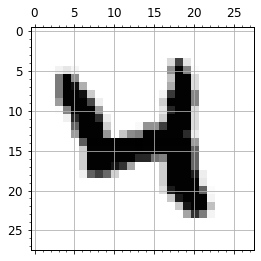

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

####  --> Define the Neural Net and its Architecture

Below we define three different models to be compared. All the models share the same architecture of hidden layers and number of neurons but differ with respect to the choice of the optimizer.
Model 1 uses SGD, Model 2 uses Adam and Model 3 uses Adagrad.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

model_DNN = []
optimizers=[SGD(), Adam(), Adagrad()]
Nmodels = 3

for imodel in range(Nmodels):
    
    ## DEFINE DIFFERENT MODELS
    model_DNN.append(tf.keras.Sequential())
    model_DNN[imodel].add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model_DNN[imodel].add(Dense(100, activation='relu'))
    model_DNN[imodel].add(Dropout(0.5))
    model_DNN[imodel].add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model_DNN[imodel].compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizers[imodel],
              metrics=['accuracy'])
    ## summary
    print("********* Model ", imodel+1, "*************")
    model_DNN[imodel].summary()

********* Model  1 *************
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
********* Model  2 *************
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)             

####  --> Define learning protocol and train the model

In [5]:
# training parameters
bs = 32
Nepochs = 10

history = []

# train DNN and store training info in history
for imodel in range(Nmodels):
    history.append(model_DNN[imodel].fit(X_train, Y_train,
          batch_size=bs,
          epochs=Nepochs,
          verbose=False,
          validation_data=(X_test, Y_test)))
print("Training succesfully completed!")

Training succesfully completed!


#### --> Evaluate the Model Performance on the *Unseen* Test Data

****** Model  1 :********
Test loss: 0.10892247408628464
Test accuracy: 0.965399980545044

****** Model  2 :********
Test loss: 0.08748817443847656
Test accuracy: 0.982699990272522

****** Model  3 :********
Test loss: 0.25421997904777527
Test accuracy: 0.9275000095367432



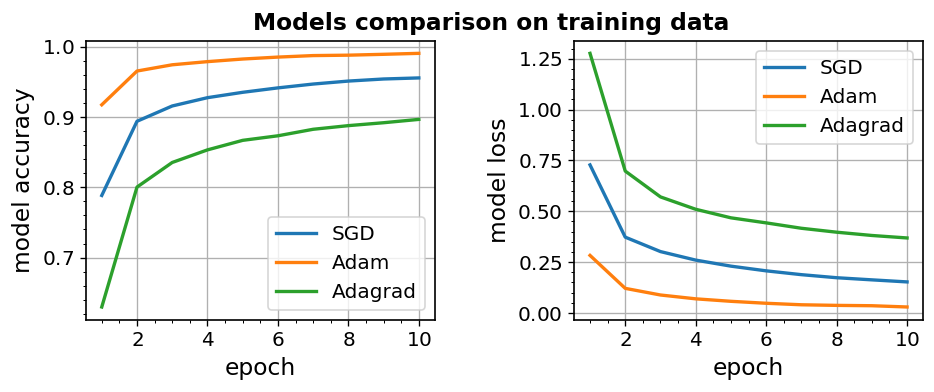

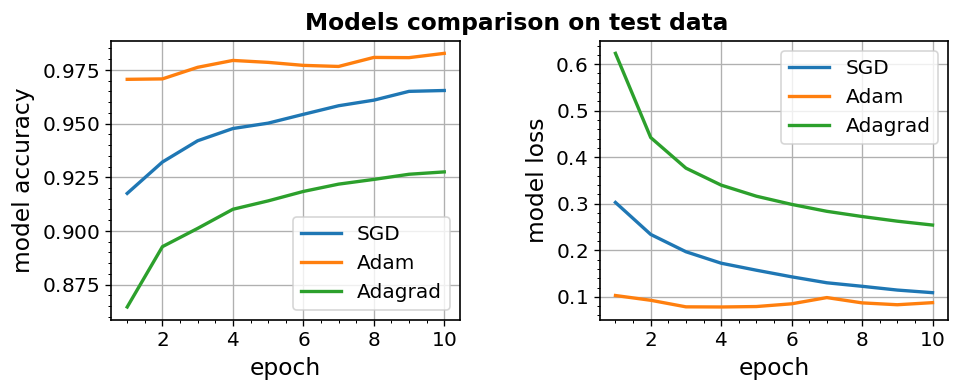

In [7]:
# evaluate model
score = []
x_epochs = np.linspace(1, Nepochs, Nepochs)

for imodel in range(Nmodels):
    score.append(model_DNN[imodel].evaluate(X_test, Y_test, verbose=False))

    # print performance
    print("****** Model ", imodel+1, ":********")
    print('Test loss:', score[imodel][0])
    print('Test accuracy:', score[imodel][1])
    print()

    
## plotting model comparison on training data
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Models comparison on training data', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9

labels = ['SGD', 'Adam', 'Adagrad']
for k in range(2):
    # look into training history
    # summarize history for accuracy
    plt.subplot(1, 2, k+1);
    
    if(k==0):
        for imodel in range(Nmodels):
            plt.plot(x_epochs, history[imodel].history['accuracy'], label=labels[imodel])
        
        plt.ylabel('model accuracy')
    
    if(k==1):
        for imodel in range(Nmodels):
            plt.plot(x_epochs,history[imodel].history['loss'], label=labels[imodel])
        plt.ylabel('model loss')
    
    plt.xlabel('epoch')
    plt.legend()      
plt.show()

## plotting model comparison on training data
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Models comparison on test data', size=14)
mpl.rcParams['figure.subplot.top'] = 0.9
for k in range(2):
    # look into training history
    # summarize history for accuracy
    plt.subplot(1, 2, k+1);
    
    if(k==0):
        for imodel in range(Nmodels):
            plt.plot(x_epochs, history[imodel].history['val_accuracy'], label=labels[imodel])
        
        plt.ylabel('model accuracy')
    
    if(k==1):
        for imodel in range(Nmodels):
            plt.plot(x_epochs, history[imodel].history['val_loss'], label=labels[imodel])
        plt.ylabel('model loss')
    
    plt.xlabel('epoch')
    plt.legend()      
plt.show()


We can see that the network trained with the Adam optimizer outperforms the others both on training and test data. We can also see that after just one epoch of training all the networks tested perform better on the test data. This might be surprising at first, but we must keep in mind that with a batch size of 32 during each epoch the network does Ntrain/32 updates.

Model  1   SGD  optimizer: 


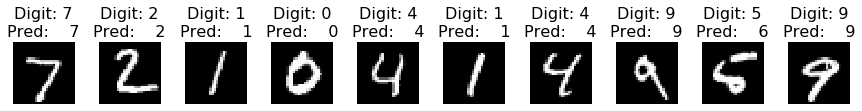

************
Model  2   Adam  optimizer: 


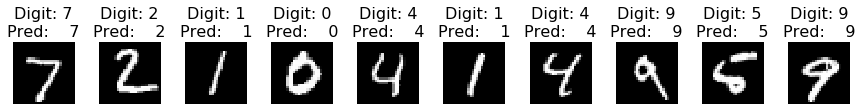

************
Model  3   Adagrad  optimizer: 


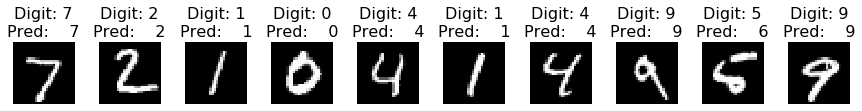

************


In [8]:
prediction = []

for imodel in range(Nmodels):
    prediction.append(model_DNN[imodel].predict(X_test))

X_test_show = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
opt = ['SGD', 'Adam', 'Adagrad']
for imodel in range(Nmodels):
    print("Model ", imodel+1, " ", opt[imodel], " optimizer: ")
    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test_show[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPred:    {}".format(np.argmax(Y_test[i]), np.argmax(prediction[imodel][i])))    
        plt.axis('off') 
    plt.show()
    print("************")

###   B.  Convolutional Neural Network (CNN) image recognition

In the second part of this computational exercise we train a convolution neural network (CNN) to recognize images of handwritten digits from the MNIST dataset.

In [9]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


####  --> Define the Neural Net and its Architecture

In [10]:
model_CNN = Sequential()
# add first convolutional layer with 32 filters (dimensionality of output space)
model_CNN.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
model_CNN.add(Dropout(0.3))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_CNN.add(Conv2D(16, kernel_size=(5, 5),
                     activation='relu'))
model_CNN.add(Dropout(0.3))
model_CNN.add(Flatten())
model_CNN.add(Dense(10, activation='softmax'))

# compile the model
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          12816     
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

####  --> Define learning protocol and train the model

In [11]:
bs = 32 ## batchsize
Nepochs = 10

history = model_CNN.fit(X_train, Y_train,
          batch_size=bs,
          epochs=Nepochs,
          verbose=False,
          validation_data=(X_test, Y_test))
print("Training succesfully completed!")

Training succesfully completed!


#### --> Evaluate the Model Performance on the *Unseen* Test Data

313/313 [==============================] - 3s 9ms/step - loss: 0.0235 - accuracy: 0.9923
****** Model  3 :********
Test loss: 0.023496152833104134
Test accuracy: 0.9922999739646912



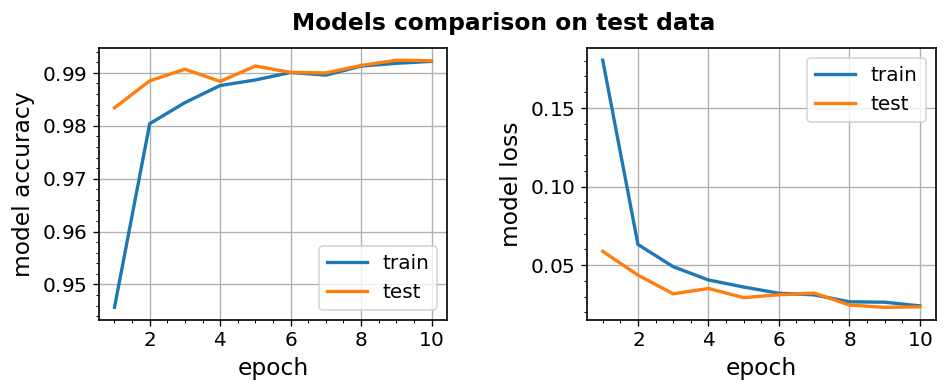

In [13]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=True)
x_epochs = np.linspace(1, Nepochs, Nepochs)

# print performance
print("****** Model ", imodel+1, ":********")
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()


plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Models comparison on test data', size=14)
mpl.rcParams['figure.subplot.top'] = 0.88

# summarize history for accuracy
plt.subplot(1, 2, 1);
plt.plot(x_epochs, history.history['accuracy'])
plt.plot(x_epochs, history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1, 2, 2);
plt.plot(x_epochs, history.history['loss'])
plt.plot(x_epochs, history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

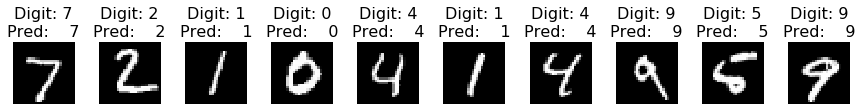

In [16]:
prediction = model_CNN.predict(X_test)
X_test_show = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
plt.figure(figsize=(15, 15)) 
for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test_show[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPred:    {}".format(np.argmax(Y_test[i]), np.argmax(prediction[i])))    
        plt.axis('off') 
plt.show()

###   C.  Test the trained networks on my handwritten digits

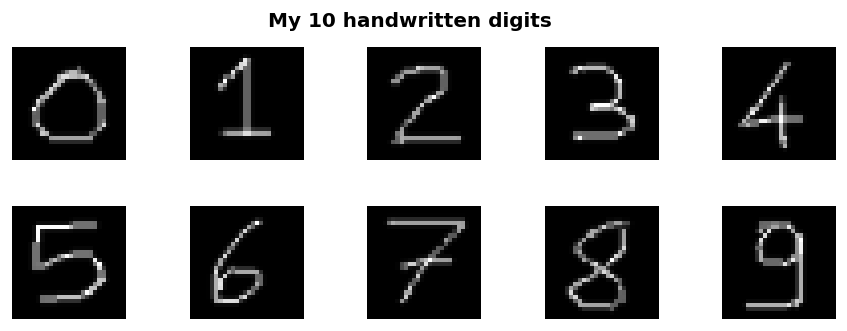

In [18]:
from PIL import Image
import os

plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('My 10 handwritten digits', size=12)
mpl.rcParams['figure.subplot.top'] = 0.88

for k in range(10):
    digit_filename = "my_handwritten_digits/{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    if(k<5):
        plt.subplot(2, 5, k+1);
    if(k>=5):
        plt.subplot(2, 5, k+1);
        
    plt.imshow(data, cmap='gray')
    plt.axis('off') 

plt.show()

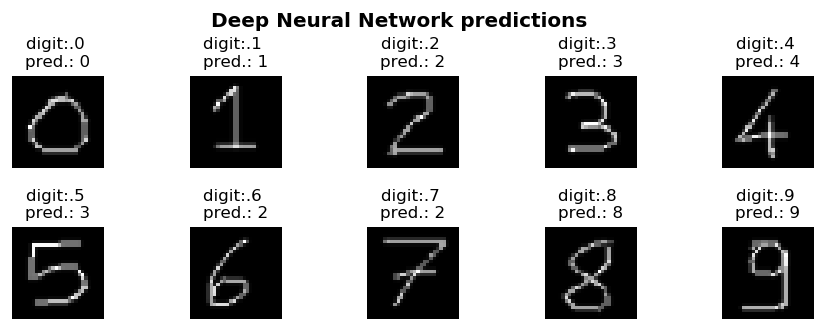

In [20]:
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Deep Neural Network predictions', size=12)
mpl.rcParams['figure.subplot.top'] = 0.8

for k in range(10):
    digit_filename = "my_handwritten_digits/{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    data = data.reshape(1,xdim*ydim)
    pred_0 = model_DNN[1].predict(data)
    data = data.reshape(xdim,ydim)
    if(k<5):
        plt.subplot(2, 5, k+1);
    if(k>=5):
        plt.subplot(2, 5, k+1);
        
    plt.imshow(data, cmap='gray')    
    plt.title("digit:.{} \npred.: {}".format(k, np.argmax(pred_0)), size=10)
    plt.axis('off') 
plt.subplots_adjust(hspace=0.65)
plt.show()

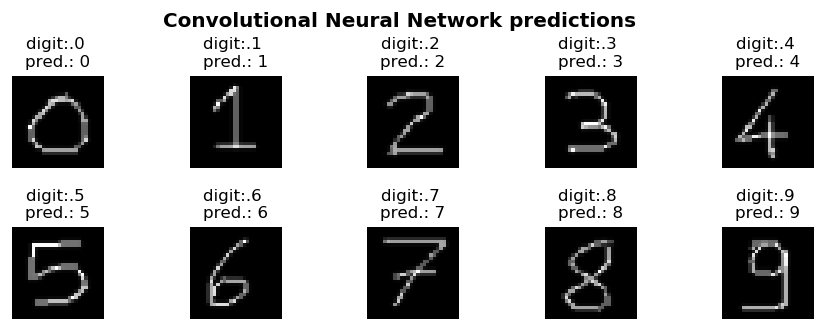

In [22]:
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Convolutional Neural Network predictions', size=12)
mpl.rcParams['figure.subplot.top'] = 0.8

for k in range(10):
    digit_filename = "my_handwritten_digits/{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((1, xdim, ydim,1))
    for j in range(ydim):
        for i in range(xdim):
            data[0][i][j][0]=pix[j,i]
    data /= 255
    pred_0 = model_CNN.predict(data)
    if(k<5):
        plt.subplot(2, 5, k+1);
    if(k>=5):
        plt.subplot(2, 5, k+1);
    data = data.reshape(28, 28)
    plt.imshow(data, cmap='gray')    
    plt.title("digit:.{} \npred.: {}".format(k, np.argmax(pred_0)), size=10)
    plt.axis('off') 
plt.subplots_adjust(hspace=0.65)
plt.show()

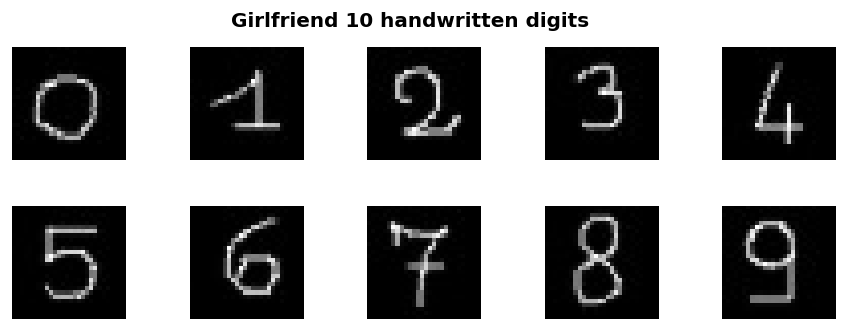

In [24]:
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Girlfriend 10 handwritten digits', size=12)
mpl.rcParams['figure.subplot.top'] = 0.88

for k in range(10):
    digit_filename = "girlfriend_hand_written_digits//{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    if(k<5):
        plt.subplot(2, 5, k+1);
    if(k>=5):
        plt.subplot(2, 5, k+1);
        
    plt.imshow(data, cmap='gray')
    plt.axis('off') 

plt.show()

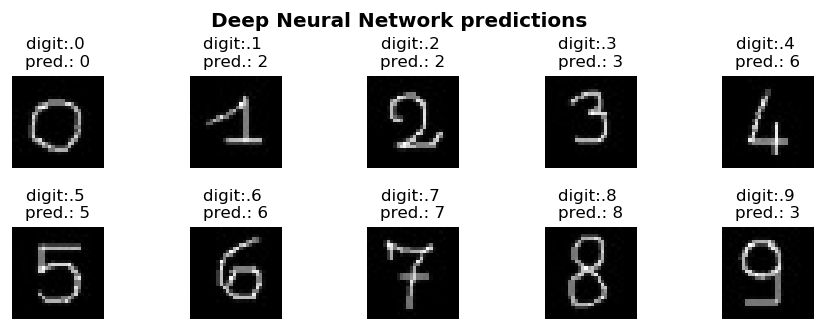

In [26]:
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Deep Neural Network predictions', size=12)
mpl.rcParams['figure.subplot.top'] = 0.8

for k in range(10):
    digit_filename = "girlfriend_hand_written_digits//{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    data = data.reshape(1,xdim*ydim)
    pred_0 = model_DNN[1].predict(data)
    data = data.reshape(xdim,ydim)
    if(k<5):
        plt.subplot(2, 5, k+1);
    if(k>=5):
        plt.subplot(2, 5, k+1);
        
    plt.imshow(data, cmap='gray')    
    plt.title("digit:.{} \npred.: {}".format(k, np.argmax(pred_0)), size=10)
    plt.axis('off') 
plt.subplots_adjust(hspace=0.65)
plt.show()

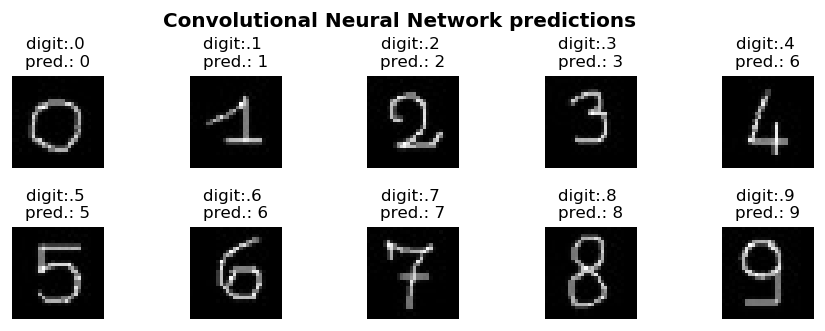

In [28]:
plt.figure(figsize=(9, 3), dpi=120)
plt.suptitle('Convolutional Neural Network predictions', size=12)
mpl.rcParams['figure.subplot.top'] = 0.8

for k in range(10):
    digit_filename = "girlfriend_hand_written_digits//{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    #print("Image size: "+str(xdim)+"x"+str(ydim))
    pix=digit_in.load();
    data = np.zeros((1, xdim, ydim,1))
    for j in range(ydim):
        for i in range(xdim):
            data[0][i][j][0]=pix[j,i]
    data /= 255
    pred_0 = model_CNN.predict(data)
    if(k<5):
        plt.subplot(2, 5, k+1);
    if(k>=5):
        plt.subplot(2, 5, k+1);
    data = data.reshape(28, 28)
    plt.imshow(data, cmap='gray')    
    plt.title("digit:.{} \npred.: {}".format(k, np.argmax(pred_0)), size=10)
    plt.axis('off') 
plt.subplots_adjust(hspace=0.65)
plt.show()